<h1>Machine Learning - Post MidSem CIA</h1>
<h6>Submitted By<br>   <br>
Name: Harini Sruthi T S & Sankar Murugan <br>     <br>                                                                         
Register Number: 23122119 & 23122031 <br>  <br>                                                                                    
Class: 3 MSc Data Science</h6>

**<h4>1. Description</h4>**
Using the Mercedes dataset performing t-SNE (t-Distributed Stochastic Neighbor Embedding).<br>
Fit reduced dataset and display plots using Machine learning algorithm.<br>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import Isomap
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from sklearn.metrics import silhouette_score

**<h4>2. Dataset Description</h4>**

This dataset contains historical stock price data for Mercedes-Benz Group AG (MBG) from [Jan/01/2020] to [May/01/2024]. The dataset includes daily opening, high, low, and closing prices, as well as adjusted closing prices and volume.<br><br>

In [2]:
df = pd.read_csv("MBG.DE.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ratings
0,02-01-2020,41.092484,41.845215,40.971882,41.566578,33.846729,2973654,5
1,03-01-2020,41.296261,41.362801,40.302322,40.813847,33.233799,4014262,5
2,06-01-2020,40.202515,40.593433,39.703465,40.593433,33.054317,3441396,5
3,07-01-2020,40.797215,41.208927,40.680767,40.917816,33.318455,2816618,5
4,08-01-2020,40.589275,41.167339,40.489468,41.146545,33.504704,2659070,5


In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Ratings'],
      dtype='object')

In [4]:
df.drop('Date', axis=1, inplace=True)
df.head()
target = df['Volume']

In [5]:

perplexity_value = min(30, df.shape[0] - 1)

# Perform t-SNE with 3D reduction
tsne = TSNE(n_components=3, perplexity=perplexity_value, random_state=42)
xtense = tsne.fit_transform(df)
print(xtense)
xtense.shape


[[-0.42178944  5.8525314   4.966563  ]
 [ 8.864179    2.7958498  -6.8325615 ]
 [ 3.9088178  -7.3852534   1.0298678 ]
 ...
 [-4.0703106   1.278345   -7.0884457 ]
 [-6.752411   -5.88618    -4.273047  ]
 [22.577326   -0.07659756 -3.4162319 ]]


(1105, 3)

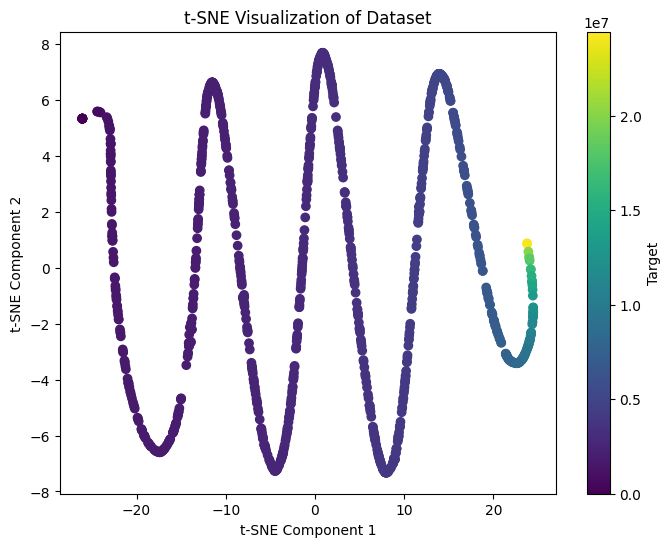

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(xtense[:, 0], xtense[:, 2], c=target, cmap='viridis')
plt.title('t-SNE Visualization of Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Target')
plt.show()

t-SNE visualization of the dataset, displaying three distinct clusters or groups, present in the dataset. The visualization aims to place similar data points closer together and dissimilar points farther apart in a 2D space, allowing for visual identification of inherent patterns and structures within the high-dimensional data.

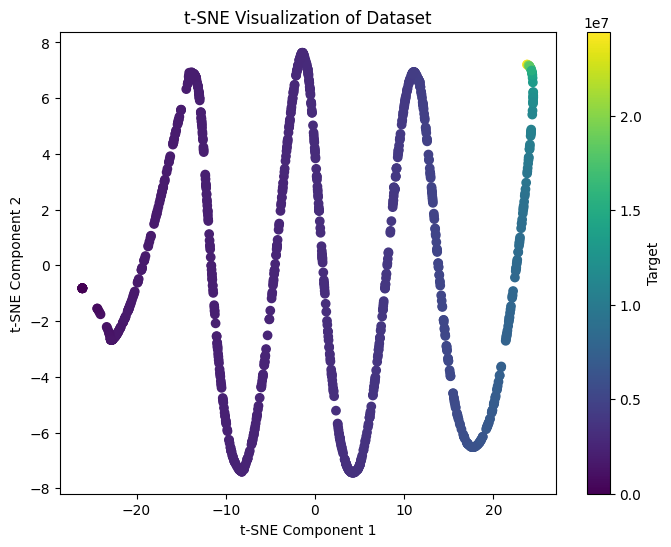

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(xtense[:, 0], xtense[:, 1], c=target, cmap='viridis')
plt.title('t-SNE Visualization of Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Target')
plt.show()

t-SNE visualization of a dataset with three distinct clusters or groups represented by purple, blue, and green colored data points. The t-SNE technique has mapped the high-dimensional data into a 2D space, where similar data points are placed closer together, and dissimilar ones are farther apart. The three distinct clusters likely correspond to different classes or categories present within the dataset being visualized.

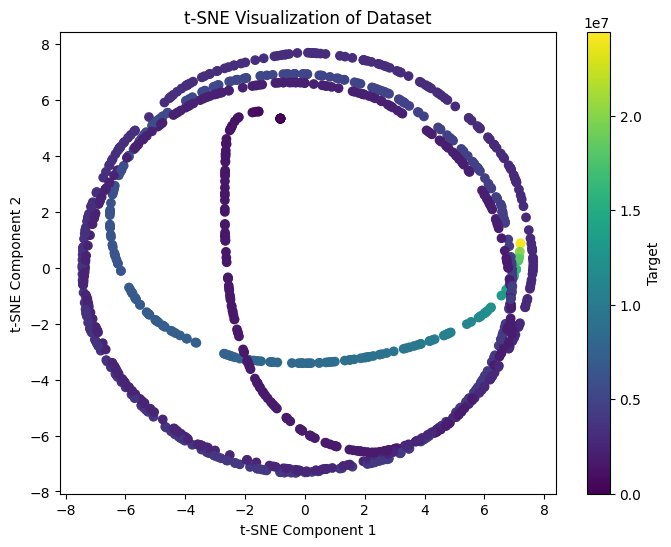

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(xtense[:, 1], xtense[:, 2], c=target, cmap='viridis')
plt.title('t-SNE Visualization of Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Target')
plt.show()

 t-SNE visualization of a dataset where the data points form a circular or ring-like pattern. The data seems to have an inherent cyclical or periodic structure, with the different colors (purple, blue, green) potentially representing different classes or categories that are arranged in a continuous loop or cycle within the high-dimensional data space mapped into this 2D visualization.

In [348]:
set = pd.DataFrame(xtense, columns=['Dimension 1', 'Dimension 2', 'Dimension 3'])

print(set.head())

   Dimension 1  Dimension 2  Dimension 3
0    -0.421789     5.852531     4.966563
1     8.864179     2.795850    -6.832561
2     3.908818    -7.385253     1.029868
3    -1.748143     7.362355    -1.410103
4    -3.646049     2.648405    -6.710379


In [350]:
X = df[['Open', 'High', 'Low', 'Close']].values
color = df['Volume'].values 

n_neighbors = 10  # Number of neighbors to consider for each point
n_components = 3  # Number of components for dimensionality reduction
lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components)
X_lle = lle.fit_transform(X)


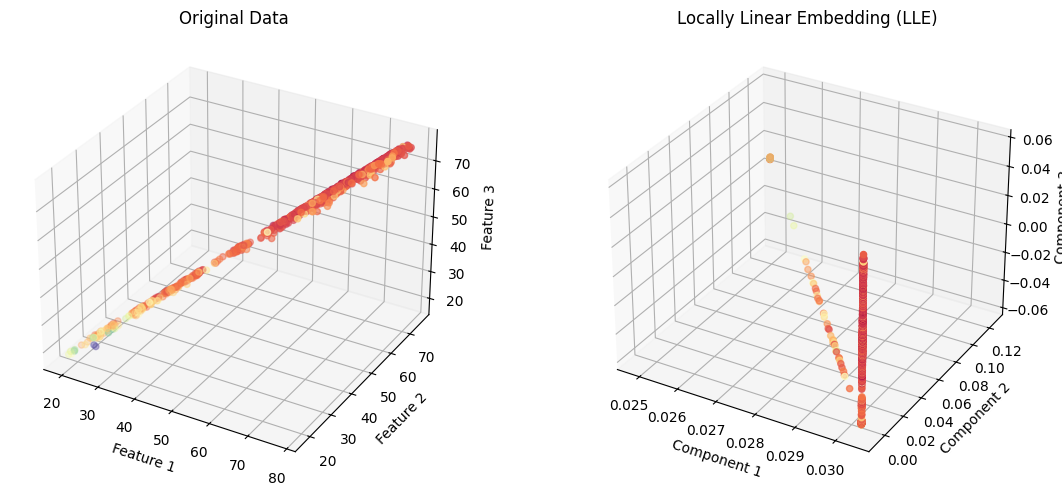

In [351]:
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 1], X[:, 2], X[:, 3], c=color, cmap=plt.cm.Spectral)
ax1.set_title('Original Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_zlabel('Feature 3')

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_lle[:, 0], X_lle[:, 1],X_lle[:, 2], c=color, cmap=plt.cm.Spectral)
ax2.set_title('Locally Linear Embedding (LLE)')
ax2.set_xlabel('Component 1')
ax2.set_ylabel('Component 2')
ax2.set_zlabel('Component 3')

plt.tight_layout()
plt.show()

On the left, the original data is plotted in a 3D space defined by three features (Feature 1, Feature 2, and Feature 3). The data appears to lie along a nonlinear manifold or curve.<br>
On the right, the LLE technique has been applied to the original data, and the resulting lower-dimensional representation is shown in another 3D plot. The LLE algorithm has attempted to preserve the local neighborhood structure of the original data while reducing its dimensionality.

In [352]:
n_neighbors = 10  # Number of neighbors to consider for each point
n_components = 3  # Number of components for dimensionality reduction
isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components)
X_iso = isomap.fit_transform(X)

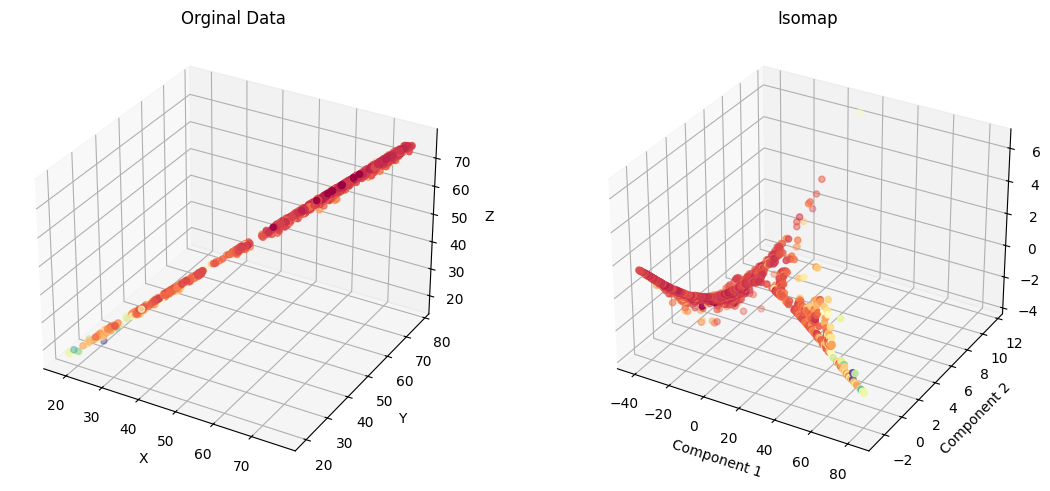

In [353]:
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax1.set_title('Orginal Data')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Plot the data after Isomap dimensionality reduction
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_iso[:, 0], X_iso[:, 1], X_iso[:, 2], c=color, cmap=plt.cm.Spectral)
ax2.set_title('Isomap')
ax2.set_xlabel('Component 1')
ax2.set_ylabel('Component 2')
ax2.set_zlabel('Component 3')

plt.tight_layout()
plt.show()

On the left, the original data is plotted in a 3D space defined by the features X, Y, and Z. The data appears to lie along a curved or nonlinear manifold.<br>
On the right, the Isomap algorithm has been applied to the original data, and the resulting lower-dimensional representation is shown in a 3D plot with Component 1, Component 2, and Component 3 as the axes. Isomap has successfully captured the underlying nonlinear manifold structure present in the original data by preserving the geodesic distances between data points.

In [355]:

# Read the CSV file into a DataFrame
df = pd.read_csv("MBG.DE.csv")

# Assign the entire DataFrame to data1
data1 = df

# Access the 'data' column of the DataFrame
data2 = df[['Open','Close']]
target = df['Volume']



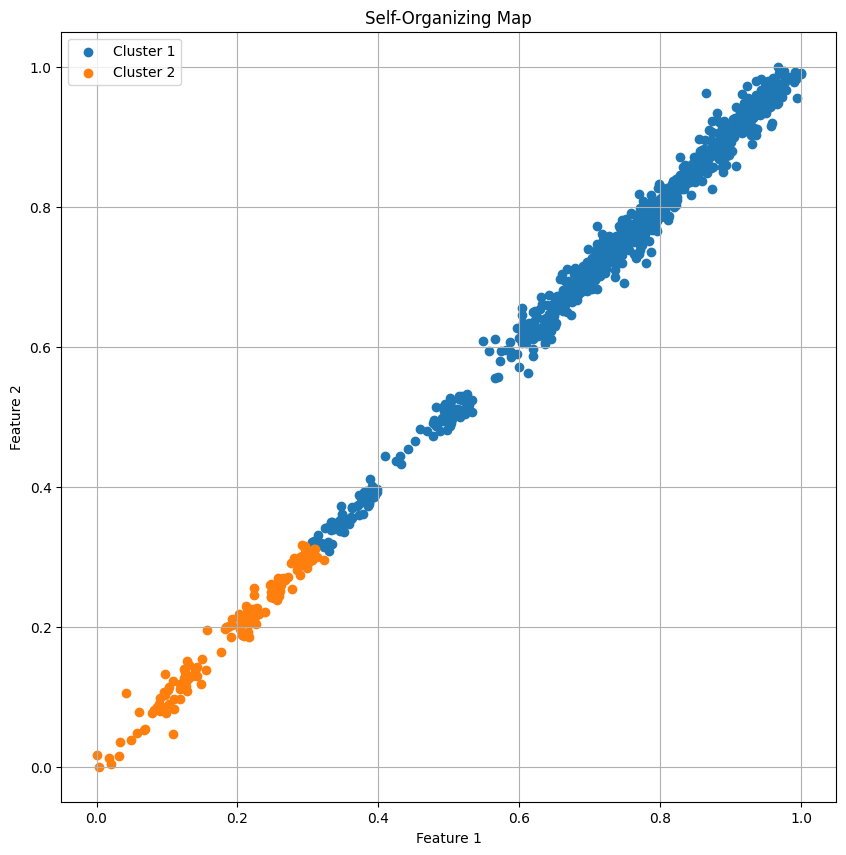

In [356]:
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data2)

map_width = 2
map_height = 2
input_length = data_normalized.shape[1]
sigma = 1
learning_rate = 0.5

# Initialize the SOM
som = MiniSom(map_width, map_height, input_length, sigma=sigma, learning_rate=learning_rate)

# Train the SOM
som.train_random(data_normalized, 30)  

# Get the clusters
clusters = {}
for i, x in enumerate(data_normalized):
    w = som.winner(x)
    if w not in clusters:
        clusters[w] = [i]
    else:
        clusters[w].append(i)

# Visualize the SOM
plt.figure(figsize=(10, 10))
for i, cluster_indices in enumerate(clusters.values()):
    plt.scatter(data_normalized[cluster_indices, 0], data_normalized[cluster_indices, 1], label=f'Cluster {i+1}')
plt.title('Self-Organizing Map')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()

In [357]:

# Flatten the clusters dictionary to get cluster labels for each data point
labels = np.zeros(data_normalized.shape[0])
for i, indices in enumerate(clusters.values()):
    labels[indices] = i

# Calculate Silhouette Score
silhouette_avg = silhouette_score(data_normalized, labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.6420062533030698


A Silhouette Score of 0.642 suggests that the clusters are well-defined and distinct, with data points in each cluster being closer to each other than to data points in other clusters. This indicates strong clustering structure in the data, which is desirable in many clustering applications.